In [1]:
import numpy as np                   
import pandas as pd             
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold

In [2]:
df = pd.read_csv('data.csv')

df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
df = df.drop(['Employee ID','Date of Joining'], axis = 1)
df = df.dropna()

df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2.0,3.0,3.8,0.16
1,Male,Service,Yes,1.0,2.0,5.0,0.36
3,Male,Service,Yes,1.0,1.0,2.6,0.20
4,Female,Service,No,3.0,7.0,6.9,0.52
5,Male,Product,Yes,2.0,4.0,3.6,0.29


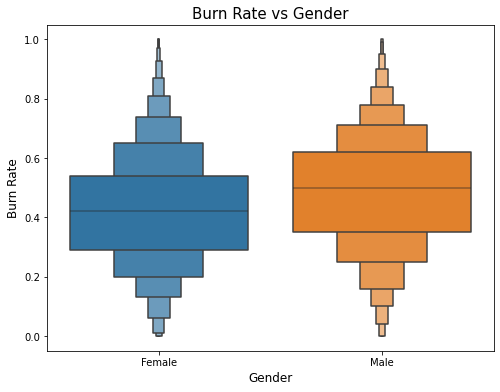

In [4]:
plt.figure(figsize = (8, 6))  
sns.boxenplot(x = "Gender", y = "Burn Rate", data = df)

plt.xlabel('Gender', size = 12) 
plt.ylabel('Burn Rate', size = 12)
plt.title('Burn Rate vs Gender', size = 15) 

plt.show()

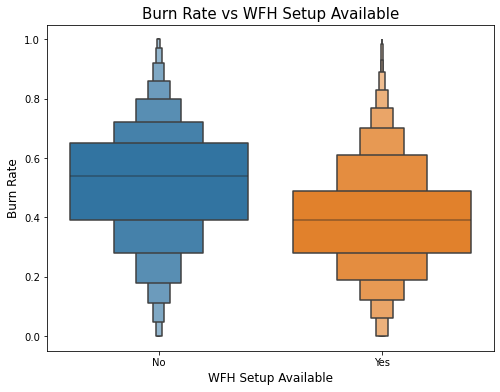

In [5]:
plt.figure(figsize = (8, 6))  
sns.boxenplot(x = "WFH Setup Available", y = "Burn Rate", data = df)

plt.xlabel('WFH Setup Available', size = 12) 
plt.ylabel('Burn Rate', size = 12)
plt.title('Burn Rate vs WFH Setup Available', size = 15) 

plt.show()

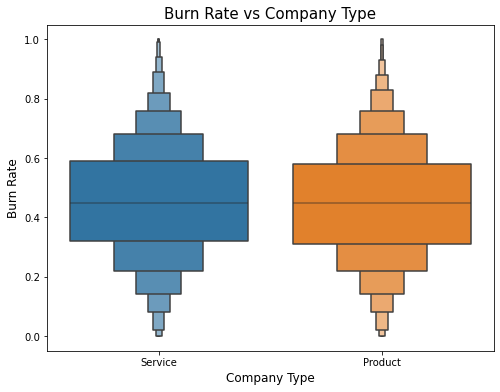

In [6]:
plt.figure(figsize = (8, 6))  
sns.boxenplot(x = "Company Type", y = "Burn Rate", data = df)

plt.xlabel('Company Type', size = 12) 
plt.ylabel('Burn Rate', size = 12)
plt.title('Burn Rate vs Company Type', size = 15) 

plt.show()

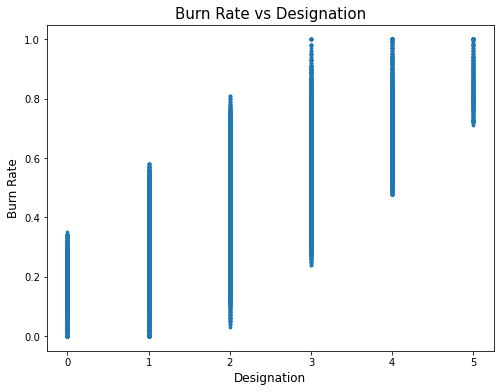

In [7]:
plt.figure(figsize = (8, 6))   
plt.scatter(df['Designation'], df['Burn Rate'], s = 8) 

plt.xlabel('Designation', size = 12) 
plt.ylabel('Burn Rate', size = 12)
plt.title('Burn Rate vs Designation', size = 15) 

plt.show()  

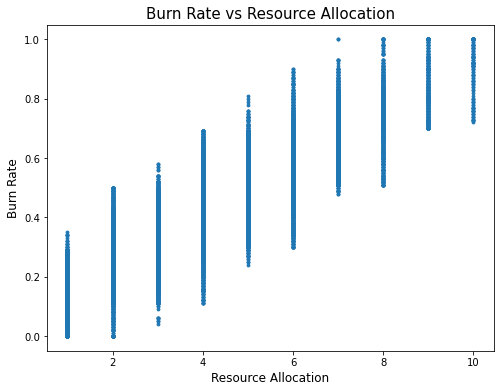

In [8]:
plt.figure(figsize = (8, 6))   
plt.scatter(df['Resource Allocation'], df['Burn Rate'], s = 8) 

plt.xlabel('Resource Allocation', size = 12) 
plt.ylabel('Burn Rate', size = 12)
plt.title('Burn Rate vs Resource Allocation', size = 15) 

plt.show()  

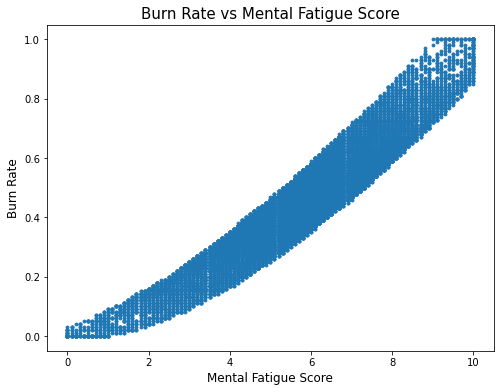

In [9]:
plt.figure(figsize = (8, 6))   
plt.scatter(df['Mental Fatigue Score'], df['Burn Rate'], s = 8) 

plt.xlabel('Mental Fatigue Score', size = 12) 
plt.ylabel('Burn Rate', size = 12)
plt.title('Burn Rate vs Mental Fatigue Score', size = 15) 

plt.show()  

In [10]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Company Type'] = df['Company Type'].apply(lambda x: 1 if x == 'Product' else 0)
df['WFH Setup Available'] = df['WFH Setup Available'].apply(lambda x: 1 if x == 'Yes' else 0)

df = df.reset_index(drop = True)
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,0,0,2.0,3.0,3.8,0.16
1,1,0,1,1.0,2.0,5.0,0.36
2,1,0,1,1.0,1.0,2.6,0.20
3,0,0,0,3.0,7.0,6.9,0.52
4,1,1,1,2.0,4.0,3.6,0.29


In [11]:
X = df[['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score']].to_numpy()
y = df['Burn Rate'].to_numpy()

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size = 0.25, random_state = 42) 

In [12]:
# Some codes in the following parts are adapted from the codes in the course assignments provided by course CS-C3240 Machine Learning D

lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred_tr_lin = lin_regr.predict(X_train)
tr_error_lin = mean_squared_error(y_train, y_pred_tr_lin) 

y_pred_val_lin = lin_regr.predict(X_val)  
val_error_lin = mean_squared_error(y_val, y_pred_val_lin) 

print("The training error for the linear regression model is: ",tr_error_lin)
print("The validation error for the linear regression model is: ",val_error_lin)

The training error for the linear regression model is:  0.0031176096398280104
The validation error for the linear regression model is:  0.003111165753550116


In [13]:
y_pred_test_lin = lin_regr.predict(X_test)  
test_error_lin = mean_squared_error(y_test, y_pred_test_lin)
test_error_lin

print("The test error for the linear regression model is: ",test_error_lin)

The test error for the linear regression model is:  0.0030639233331425787


In [14]:
degrees = list(range(1, 8))

tr_errors_poly = []          
val_errors_poly = []

for degree in degrees:    
    
    regr = LinearRegression() 
    poly = PolynomialFeatures(degree = degree)   
    X_train_poly = poly.fit_transform(X_train)   
    regr.fit(X_train_poly, y_train)   
    
    y_pred_train_poly = regr.predict(X_train_poly)    
    tr_error_poly = mean_squared_error(y_train, y_pred_train_poly)        
    X_val_poly = poly.fit_transform(X_val)      
    y_pred_val_poly = regr.predict(X_val_poly)     
    val_error_poly = mean_squared_error(y_val, y_pred_val_poly)        
    
    tr_errors_poly.append(tr_error_poly)
    val_errors_poly.append(val_error_poly)

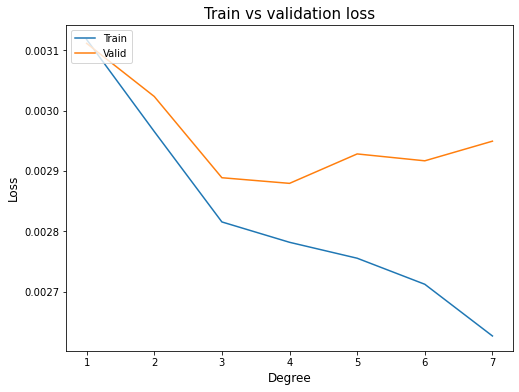

In [15]:
plt.figure(figsize=(8, 6))

plt.plot(degrees, tr_errors_poly, label = 'Train')
plt.plot(degrees, val_errors_poly,label = 'Valid')
plt.legend(loc = 'upper left')

plt.xlabel('Degree', size = 12)
plt.ylabel('Loss', size = 12)
plt.title('Train vs validation loss', size = 15)
plt.show()

In [16]:
regr = LinearRegression()
poly = PolynomialFeatures(degree = 4) 
X_train_poly = poly.fit_transform(X_train)   
regr.fit(X_train_poly, y_train) 

y_pred_train_poly = regr.predict(X_train_poly)    
tr_error_poly = mean_squared_error(y_train, y_pred_train_poly) 

X_val_poly = poly.fit_transform(X_val)     
y_pred_val_poly = regr.predict(X_val_poly)     
val_error_poly = mean_squared_error(y_val, y_pred_val_poly)  

print("The training error for the polynomial regression model is: ",tr_error_poly)
print("The validation error for the polynomial regression model is: ",val_error_poly)

The training error for the polynomial regression model is:  0.002781833058057809
The validation error for the polynomial regression model is:  0.0028793950057930074


In [17]:
X_test_poly = poly.fit_transform(X_test)
y_pred_test_poly = regr.predict(X_test_poly)  
test_error_poly = mean_squared_error(y_test, y_pred_test_poly)

print("The test error for the polynomial regression model is: ",test_error_poly)

The test error for the polynomial regression model is:  0.0028066086120711116
